In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [7]:
def print_metrics(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"AUC score: {roc_auc_score(y_test, y_pred)}")
    print(f"classification_report:\n {classification_report(y_test, y_pred)}")

def plot_imp_vars(coef, df_name, vectorizer):
    coef = pd.Series(coef, index=vectorizer.get_feature_names_out())
    imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
    imp_coef.plot(kind = "barh", color=['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red','green','green','green','green', 'green', 'green', 'green', 'green', 'green','green'])
    plt.title("Coefficients in Logistic Regression Model for " + str(df_name))

In [4]:
curr_tweets_df = pd.read_csv("curr_tweets.csv")
curr_tweets_df

,body,Target
0,well washing your tesla cybertruck in a drive ...,0.0
1,do you all have a system for the model 3 premi...,0.0
2,yup will drop tesla eps to near zero powerwall...,0.0
3,is paying now for decision in 2019 tesla secre...,0.0
4,as a proud german tesla investor and happy mod...,0.0
...,...,...
7574,gillion avoigt man i hope whoever you have rep...,0.0
7575,as of march 271 billion in cash amp 24 billion...,0.0
7576,i can see tesla tesla around 2000 by 2027 easy,0.0
7577,market close tesla closed at 1719700high 17562...,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(curr_tweets_df['body'], curr_tweets_df['Target'], test_size=0.2, random_state=42)

In [9]:
# Initializing the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)

# Fit the vectorizer on the training set and transform both training and testing sets
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Running logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train_vec, y_train)

# Predicting the test set
y_pred = log_reg.predict(X_test_vec)
print_metrics(y_test, y_pred)

Accuracy: 0.6827176781002638
AUC score: 0.6815208803168805
classification_report:
               precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       793
         1.0       0.67      0.66      0.66       723

    accuracy                           0.68      1516
   macro avg       0.68      0.68      0.68      1516
weighted avg       0.68      0.68      0.68      1516



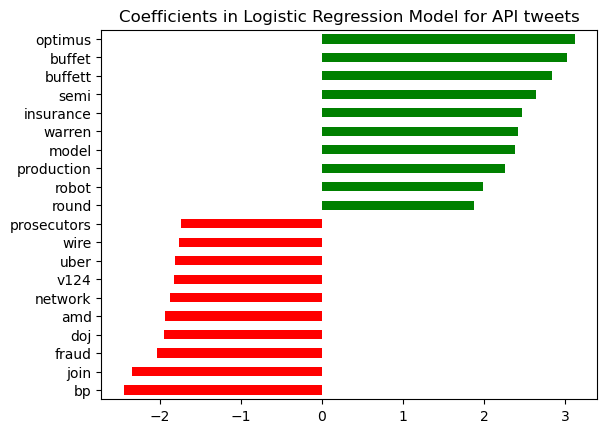

In [11]:
plot_imp_vars(log_reg.coef_[0], "API tweets", vectorizer)